Maximum speedup achieved:
  N=       100: 1.00× at 1 threads
  N=  10000000: 4.21× at 6 threads
  N= 400000000: 4.02× at 8 threads


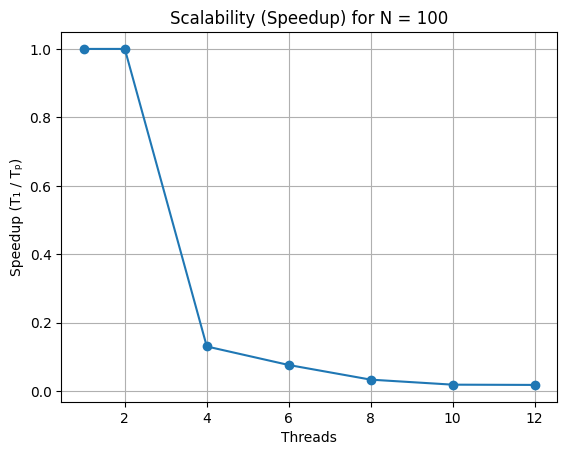

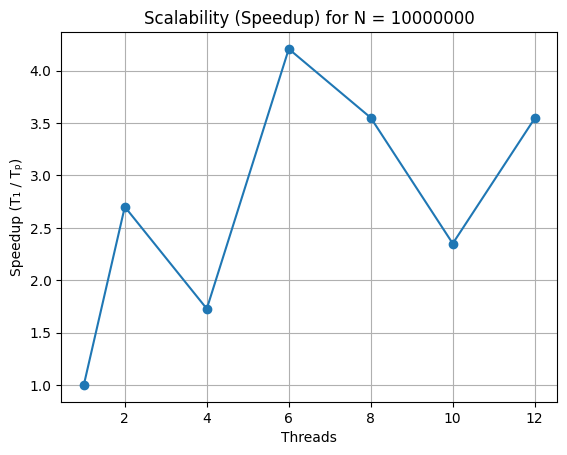

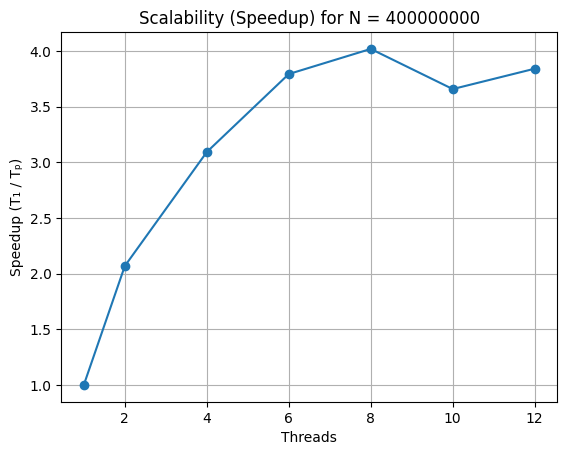

In [1]:
import matplotlib.pyplot as plt

# Data provided
results = {
    100:        {1: 0.000017, 2: 0.000017, 4: 0.000130, 6: 0.000222, 8: 0.000503, 10: 0.000888, 12: 0.000924},
    10_000_000: {1: 0.041922, 2: 0.015525, 4: 0.024273, 6: 0.009963, 8: 0.011807, 10: 0.017841, 12: 0.011825},
    400_000_000:{1: 1.109832, 2: 0.536624, 4: 0.358922, 6: 0.292622, 8: 0.276192, 10: 0.303422, 12: 0.288956},
}

# Compute speedups and find maxima
max_info = {}  # N -> (threads, speedup)
speedups = {}  # store for plotting

for N, data in results.items():
    base_time = data[1]
    spd = {p: base_time / t for p, t in data.items()}
    speedups[N] = spd
    # Determine max speedup (largest value; if tie, smallest p)
    best_threads = max(spd, key=lambda p: (spd[p], -p))
    max_info[N] = (best_threads, spd[best_threads])

# Plot speedup vs threads for each N
for N, spd in speedups.items():
    plt.figure()
    threads = sorted(spd.keys())
    values = [spd[p] for p in threads]
    plt.plot(threads, values, marker='o')
    plt.title(f"Scalability (Speedup) for N = {N}")
    plt.xlabel("Threads")
    plt.ylabel("Speedup (T₁ / Tₚ)")
    plt.grid(True)

# Print maxima
print("Maximum speedup achieved:")
for N, (p, s) in max_info.items():
    print(f"  N={N:>10}: {s:.2f}× at {p} threads")
